<a href="https://colab.research.google.com/github/ahd-rafi/Chatbot/blob/main/Machine_Learning_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LESSON 1**

Linear Regression and Gradient Descent

Jovian Link:

https://jovian.ai/aakashns/python-sklearn-linear-regression


In [1]:
medical_charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7df9a42edc60>)

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
!pip install jovian --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 450.0 kB/s eta 0:00:00


**EDA AND VISUALIZATION**

In [10]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [13]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal = 'box',
                   nbins = 47,
                   title = 'Distribution of Age')

fig.update_layout(bargap = 0.1)
fig.show()


In [14]:
fiq = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence = ['red'],
                   title = 'Distribution of BMI (Body Mass Index)')

fig.update_layout(bargap = 0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal  ='box',
                   color = 'smoker',
                   color_discrete_sequence = ['green', 'gray'],
                   title = 'Annual Medical Charges')

fig.update_layout(bargap = 0.1)
fig.show()

In [16]:
fig = px.histogram(medical_df,
                   x = 'region',
                   y = 'charges',
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence  =['green', 'red'],
                   title = 'Medical charges by Sex and Region')

fig.update_layout(bargap = 0.1)
fig.show()


In [17]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [18]:
fig = px.histogram(medical_df, x = 'smoker', color = 'sex', title = 'smoker')

fig.show()

In [19]:
fig = px.histogram(medical_df, x = 'region', color = 'sex', title = 'smoker')

fig.show()

In [20]:
fig = px.scatter(medical_df,
                 x = 'age',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'Age vs Charges')

fig.update_traces(marker_size = 5)
fig.show()

In [21]:
fig = px.scatter(medical_df,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'BMI vs Charges')

fig.update_traces(marker_size = 5)
fig.show()

In [22]:
fig = px.violin(medical_df,
                x = 'children',
                y = 'charges')

fig.show()

**Correlation**

In [23]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [24]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [25]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [26]:
medical_df.smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


In [27]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [28]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [29]:
import numpy as np
medical_df.select_dtypes(np.number).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

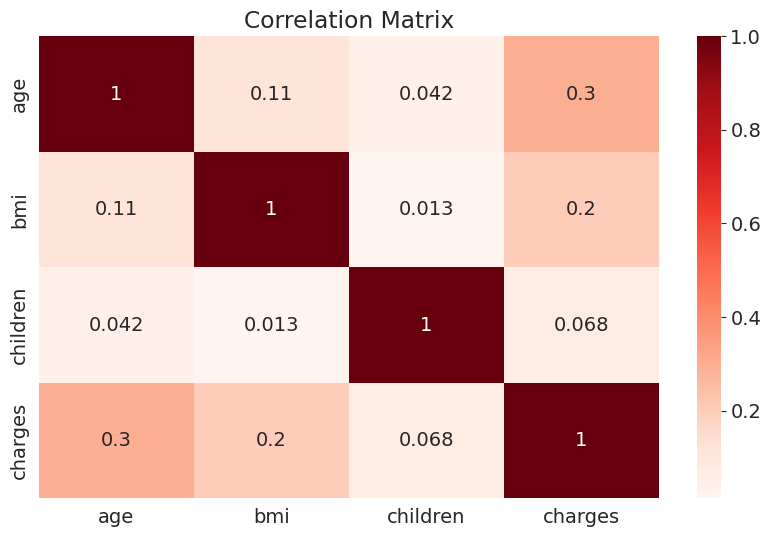

In [30]:
sns.heatmap(medical_df.select_dtypes(np.number).corr(), cmap = 'Reds', annot = True)
plt.title('Correlation Matrix')